In [2]:
pip install idx2numpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for idx2numpy: filename=idx2numpy-1.2.3-py3-none-any.whl size=7903 sha256=a4b4701d46f9d21a145f49d154489345c10e884c5dab8569746f7591eda54542
  Stored in directory: /root/.cache/pip/wheels/e0/f4/e7/643fc5f932ec2ff92997f43f007660feb23f948aa8486f1107
Successfully built idx2numpy


In [3]:
cd drive

/content/drive


In [4]:
cd MyDrive

/content/drive/MyDrive


Importing Data for training and testing of images and labels

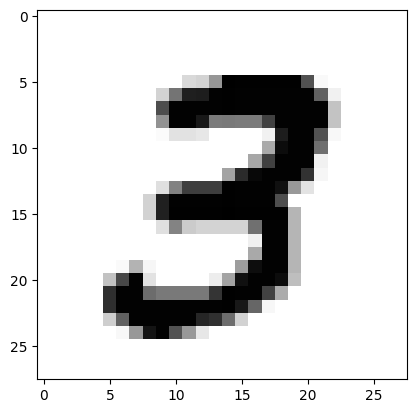

In [5]:
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.svm import SVC, LinearSVC
import pandas as pd
import numpy as np
import idx2numpy
import matplotlib.pyplot as plt
from sklearn import svm, metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as matplot
from sklearn.metrics import confusion_matrix
import seaborn as sb
import time





#train data
imagefile_train = 'train-images-idx3-ubyte'
imagearray_train = idx2numpy.convert_from_file(imagefile_train)

labelfile_train = 'train-labels-idx1-ubyte'
labels_train = idx2numpy.convert_from_file(labelfile_train)

plt.imshow(imagearray_train[7], cmap=plt.cm.binary)


#test data
imagefile_test = 't10k-images-idx3-ubyte'
imagearray_test = idx2numpy.convert_from_file(imagefile_test)

# preprocessing images

labelfile_test = 't10k-labels-idx1-ubyte'
labels_test = idx2numpy.convert_from_file(labelfile_test)


X_train, y_train = imagearray_train, labels_train
X_test, y_test = imagearray_test, labels_test

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1]*X_train.shape[2])
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1]*X_test.shape[2])


Trying different SVM Kernels and finding accuracy

In [6]:

svm_rbf = SVC(kernel='rbf')
# fit
start = time.time()
svm_rbf.fit(X_train, y_train)
end = time.time()
training_time2 = end - start

print('Training time: ', training_time2, 's')


Training time:  344.4380793571472 s


In [7]:
start = time.time()
pred_rbf = svm_rbf.predict(X_test)
end = time.time()
training_time = end - start

print('Training time: ', training_time2, 's')
print('Testing time: ', training_time, 's')
rbf_accuracy = accuracy_score(y_test, pred_rbf)
print(rbf_accuracy)
print("Performance Report: \n %s \n" % (metrics.classification_report(y_test, pred_rbf)))
print("Precision Score: \n %s \n" % (precision_score(y_test, pred_rbf, average='micro')))
print("Recall Score: \n %s \n" % (recall_score(y_test, pred_rbf, average='micro')))
print("F1 Score: \n %s \n" % (f1_score(y_test, pred_rbf, average='micro')))


Training time:  344.4380793571472 s
Testing time:  140.8392686843872 s
0.9792
Performance Report: 
               precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.97      0.98      1032
           3       0.97      0.99      0.98      1010
           4       0.98      0.98      0.98       982
           5       0.99      0.98      0.98       892
           6       0.99      0.99      0.99       958
           7       0.98      0.97      0.97      1028
           8       0.97      0.98      0.97       974
           9       0.97      0.96      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000
 

Precision Score: 
 0.9792 

Recall Score: 
 0.9792 

F1 Score: 
 0.9792 



In [9]:
svm_linear = LinearSVC(dual=False)
start = time.time()
svm_linear.fit(X_train, y_train)
end = time.time()
training_time = end - start

print('Training time: ', training_time, 's')

Training time:  2375.6787581443787 s


In [10]:
start = time.time()
pred_linear = svm_linear.predict(X_test)
end = time.time()
training_time2 = end - start

print('Training time: ', training_time, 's')
print('Testing time: ', training_time2, 's')

linear_accuracy = accuracy_score(y_test, pred_linear)
print(linear_accuracy)
print("Performance Report: \n %s \n" % (metrics.classification_report(y_test, pred_linear)))
print("Precision Score: \n %s \n" % (precision_score(y_test, pred_linear, average='micro')))
print("Recall Score: \n %s \n" % (recall_score(y_test, pred_linear, average='micro')))
print("F1 Score: \n %s \n" % (f1_score(y_test, pred_linear, average='micro')))

Training time:  2375.6787581443787 s
Testing time:  0.09818196296691895 s
0.9169
Performance Report: 
               precision    recall  f1-score   support

           0       0.95      0.98      0.97       980
           1       0.96      0.98      0.97      1135
           2       0.92      0.88      0.90      1032
           3       0.90      0.91      0.90      1010
           4       0.92      0.93      0.93       982
           5       0.88      0.86      0.87       892
           6       0.93      0.95      0.94       958
           7       0.92      0.92      0.92      1028
           8       0.87      0.87      0.87       974
           9       0.90      0.89      0.90      1009

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000
 

Precision Score: 
 0.9169 

Recall Score: 
 0.9169 

F1 Score: 
 0.9169 



In [8]:
svm_poly = SVC(kernel='poly')

start = time.time()
svm_poly.fit(X_train, y_train)

end = time.time()
training_time2 = end - start

print('Training time: ', training_time2, 's')


Training time:  351.8472557067871 s


In [9]:
start = time.time()
pred_poly = svm_poly.predict(X_test)
end = time.time()
training_time = end - start

print('Training time: ', training_time2, 's')
print('Testing time: ', training_time, 's')

poly_accuracy = accuracy_score(y_test, pred_poly)
print(poly_accuracy)
print("Performance Report: \n %s \n" % (metrics.classification_report(y_test, pred_poly)))
print("Precision Score: \n %s \n" % (precision_score(y_test, pred_poly, average='micro')))
print("Recall Score: \n %s \n" % (recall_score(y_test, pred_poly, average='micro')))
print("F1 Score: \n %s \n" % (f1_score(y_test, pred_poly, average='micro')))

Training time:  351.8472557067871 s
Testing time:  64.91923880577087 s
0.9771
Performance Report: 
               precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.97      0.99      0.98      1135
           2       0.98      0.97      0.98      1032
           3       0.98      0.97      0.98      1010
           4       0.97      0.98      0.98       982
           5       0.97      0.97      0.97       892
           6       0.98      0.98      0.98       958
           7       0.97      0.97      0.97      1028
           8       0.98      0.97      0.98       974
           9       0.97      0.96      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000
 

Precision Score: 
 0.9771 

Recall Score: 
 0.9771 

F1 Score: 
 0.9771 



In [7]:
svm_sig = SVC(kernel='sigmoid')
start = time.time()
svm_sig.fit(X_train, y_train)
end = time.time()
training_time2 = end - start

print('Training time: ', training_time2, 's')

Training time:  507.3958601951599 s


In [8]:
start = time.time()

pred_sig = svm_sig.predict(X_test)

end = time.time()
training_time = end - start
print('Training time: ', training_time2, 's')
print('Testing time: ', training_time, 's')

sig_accuracy = accuracy_score(y_test, pred_sig)
print(sig_accuracy)
print("Performance Report: \n %s \n" % (metrics.classification_report(y_test, pred_sig)))
print("Precision Score: \n %s \n" % (precision_score(y_test, pred_sig, average='micro')))
print("Recall Score: \n %s \n" % (recall_score(y_test, pred_sig, average='micro')))
print("F1 Score: \n %s \n" % (f1_score(y_test, pred_sig, average='micro')))

Training time:  507.3958601951599 s
Testing time:  135.45381951332092 s
0.7759
Performance Report: 
               precision    recall  f1-score   support

           0       0.81      0.83      0.82       980
           1       0.88      0.95      0.91      1135
           2       0.75      0.75      0.75      1032
           3       0.78      0.72      0.75      1010
           4       0.78      0.85      0.81       982
           5       0.57      0.66      0.61       892
           6       0.85      0.82      0.83       958
           7       0.88      0.83      0.85      1028
           8       0.69      0.64      0.67       974
           9       0.76      0.68      0.72      1009

    accuracy                           0.78     10000
   macro avg       0.77      0.77      0.77     10000
weighted avg       0.78      0.78      0.78     10000
 

Precision Score: 
 0.7759 

Recall Score: 
 0.7759 

F1 Score: 
 0.7759 



Comparing accuracies in a graph

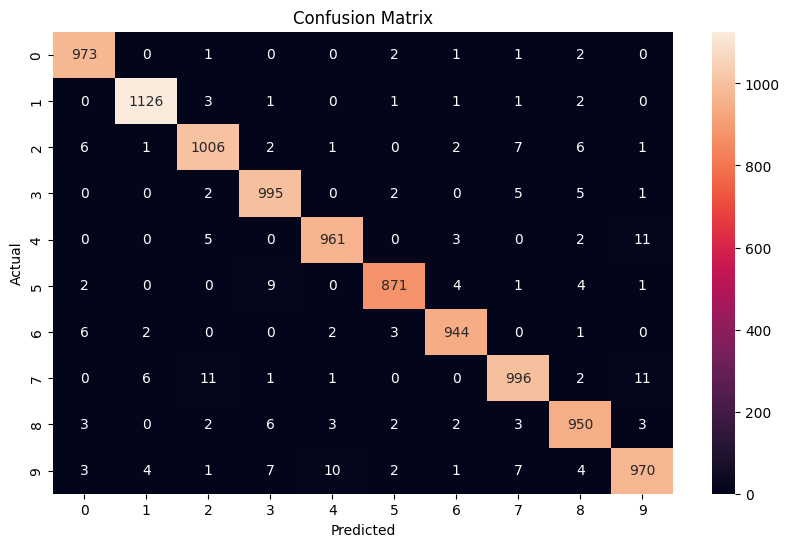

In [ ]:
matrix = confusion_matrix(y_test, pred_rbf)
matplot.subplots(figsize=(10, 6))
sb.heatmap(matrix, annot = True, fmt = 'g')
matplot.title("Confusion Matrix")
matplot.ylabel("Actual")
matplot.xlabel("Predicted")

matplot.show()

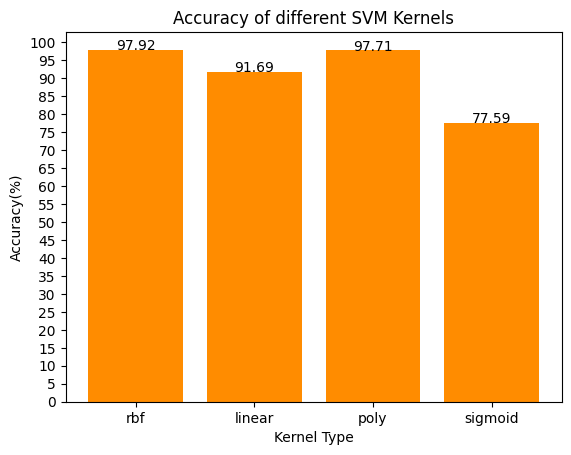

In [ ]:
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha = 'center')
x = ['rbf', 'linear', 'poly', 'sigmoid']
y = [rbf_accuracy*100, linear_accuracy*100, poly_accuracy*100, sig_accuracy*100]
plt.bar(x,y, color = 'darkorange')
plt.xlabel("Kernel Type")
plt.ylabel("Accuracy(%)")
plt.title("Accuracy of different SVM Kernels")
addlabels(x, y)
plt.yticks(np.arange(0, 105, 5))
plt.show()

In [ ]:
coefficient = []
n_supp = []
sup_vec = []
i = 0
svm = SVC(kernel='rbf', gamma=0.01)
model = svm.fit(X_train, y_train)
pred = svm.predict(X_test)
a = accuracy_score(y_test, pred)
a
# df = pd.DataFrame(columns = ['c','gamma','test_acc'])
# for c in [0.01, 1, 10]:
#     for g in [0.01, 1, 10]:
#         svm = SVC(kernel='rbf', C=c, gamma=g)
#         model = svm.fit(X_train, y_train)
#         globals()['model%s' % i] = model
#         d_coef = svm.dual_coef_
#         support = svm.n_support_
#         sv = svm.support_
    
        
    
#         pred = svm.predict(X_test)
#         a = accuracy_score(y_test, pred)
    
#         coefficient.append(d_coef)
#         n_supp.append(support)
#         sup_vec.append(sv)
#         df.loc[i] = [c,g,a]
#         i=i+1

0.1135

In [ ]:
df

Summary:

1- Importing data from files

2- Reshaping data to 2-dimensions

3- Using SVM as the classifier and comparing different Kernels (RBF, Linear, Poly, Sigmoid)

4- Showing accuracy and performance report

5- Shows that RBF is the best model with an accuracy of 97.92%

6- Shows Confusion matrix for RBF which shows that it is very accurate when comparing the actual vs predicited classification

7- Visualizes the different kernels and their accuracies
